#EDA

#

--

#Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt # run pip install plotly if error
import seaborn
import seaborn as sns
import plotly.express as px # if error install in terminal : pip install plotly
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline # show the plots on the online copy


UsageError: unrecognized arguments: # show the plots on the online copy


In [2]:
clients = pd.read_csv('data/client_train.csv')
invoices = pd.read_csv('data/invoice_train.csv')
data = pd.merge(clients, invoices, how='left', on='client_id')
data.head(3)

,disrict,client_id,client_catg,region,creation_date,target,invoice_date,tarif_type,counter_number,counter_statue,...,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,60,train_Client_0,11,101,31/12/1994,0.0,2014-03-24,11,1335667,0,...,8,1,82,0,0,0,14302,14384,4,ELEC
1,60,train_Client_0,11,101,31/12/1994,0.0,2013-03-29,11,1335667,0,...,6,1,1200,184,0,0,12294,13678,4,ELEC
2,60,train_Client_0,11,101,31/12/1994,0.0,2015-03-23,11,1335667,0,...,8,1,123,0,0,0,14624,14747,4,ELEC


# Data mining!

1- date.time for dates tranformation
2- 

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4476749 entries, 0 to 4476748
Data columns (total 21 columns):
 #   Column                Dtype  
---  ------                -----  
 0   disrict               int64  
 1   client_id             object 
 2   client_catg           int64  
 3   region                int64  
 4   creation_date         object 
 5   target                float64
 6   invoice_date          object 
 7   tarif_type            int64  
 8   counter_number        int64  
 9   counter_statue        object 
 10  counter_code          int64  
 11  reading_remarque      int64  
 12  counter_coefficient   int64  
 13  consommation_level_1  int64  
 14  consommation_level_2  int64  
 15  consommation_level_3  int64  
 16  consommation_level_4  int64  
 17  old_index             int64  
 18  new_index             int64  
 19  months_number         int64  
 20  counter_type          object 
dtypes: float64(1), int64(15), object(5)
memory usage: 751.4+ MB


In [4]:
data['invoice_date'] = pd.to_datetime(data['invoice_date'], format='%Y/%m/%d')


In [5]:
# Transforming to date.time type
data['creation_date'] = pd.to_datetime(data['creation_date'], format='%d/%m/%Y')

In [6]:
#
data.dtypes

disrict                          int64
client_id                       object
client_catg                      int64
region                           int64
creation_date           datetime64[ns]
target                         float64
invoice_date            datetime64[ns]
tarif_type                       int64
counter_number                   int64
counter_statue                  object
counter_code                     int64
reading_remarque                 int64
counter_coefficient              int64
consommation_level_1             int64
consommation_level_2             int64
consommation_level_3             int64
consommation_level_4             int64
old_index                        int64
new_index                        int64
months_number                    int64
counter_type                    object
dtype: object

In [7]:
# Change datatypes
data = data.astype({'disrict': str})
data = data.astype({'client_catg': str})
data = data.astype({'region': str})
data = data.astype({'tarif_type': str})
data = data.astype({'counter_number': str})
data = data.astype({'counter_code': str})
data = data.astype({'reading_remarque': str})
data = data.astype({'counter_coefficient': str})
data = data.astype({'counter_type': str})

data.dtypes

disrict                         object
client_id                       object
client_catg                     object
region                          object
creation_date           datetime64[ns]
target                         float64
invoice_date            datetime64[ns]
tarif_type                      object
counter_number                  object
counter_statue                  object
counter_code                    object
reading_remarque                object
counter_coefficient             object
consommation_level_1             int64
consommation_level_2             int64
consommation_level_3             int64
consommation_level_4             int64
old_index                        int64
new_index                        int64
months_number                    int64
counter_type                    object
dtype: object

In [8]:
dist_cols = pd.get_dummies(data['disrict'], prefix='district_', drop_first=True)
dist_cols1 = pd.get_dummies(data['client_catg'], prefix='client_catg_', drop_first=True)
dist_cols2 = pd.get_dummies(data['region'], prefix='region_', drop_first=True)
dist_cols3 = pd.get_dummies(data['tarif_type'], prefix='tarif_type_', drop_first=True)
dist_cols4 = pd.get_dummies(data['counter_statue'], prefix='counter_statue_', drop_first=True)
dist_cols5 = pd.get_dummies(data['counter_code'], prefix='counter_code_', drop_first=True)
dist_cols6 = pd.get_dummies(data['reading_remarque'], prefix='reading_remarque_', drop_first=True)
dist_cols7 = pd.get_dummies(data['counter_coefficient'], prefix='counter_coefficient_', drop_first=True)
dist_cols8 = pd.get_dummies(data['counter_type'], prefix='counter_type_', drop_first=True)

# counter_number not


In [9]:
data = pd.concat([data, dist_cols, dist_cols1, dist_cols2, dist_cols3 ], axis=1)
data = pd.concat([data, dist_cols5, dist_cols6, dist_cols7, dist_cols8], axis=1)

In [10]:
#data.head(1)
#data.info()
data.columns

Index(['disrict', 'client_id', 'client_catg', 'region', 'creation_date',
       'target', 'invoice_date', 'tarif_type', 'counter_number',
       'counter_statue',
       ...
       'counter_coefficient__30', 'counter_coefficient__33',
       'counter_coefficient__4', 'counter_coefficient__40',
       'counter_coefficient__5', 'counter_coefficient__50',
       'counter_coefficient__6', 'counter_coefficient__8',
       'counter_coefficient__9', 'counter_type__GAZ'],
      dtype='object', length=130)

In [11]:
dist_cols.head(1)

,district__62,district__63,district__69
0,0,0,0


In [12]:
data.columns

Index(['disrict', 'client_id', 'client_catg', 'region', 'creation_date',
       'target', 'invoice_date', 'tarif_type', 'counter_number',
       'counter_statue',
       ...
       'counter_coefficient__30', 'counter_coefficient__33',
       'counter_coefficient__4', 'counter_coefficient__40',
       'counter_coefficient__5', 'counter_coefficient__50',
       'counter_coefficient__6', 'counter_coefficient__8',
       'counter_coefficient__9', 'counter_type__GAZ'],
      dtype='object', length=130)

In [13]:
data = data.drop(['disrict', 'client_catg', 'region', 'tarif_type', 'counter_statue', 'counter_code', 'reading_remarque', 'counter_coefficient','counter_type'], axis=1)

In [14]:
data.head(2)

,client_id,creation_date,target,invoice_date,counter_number,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,...,counter_coefficient__30,counter_coefficient__33,counter_coefficient__4,counter_coefficient__40,counter_coefficient__5,counter_coefficient__50,counter_coefficient__6,counter_coefficient__8,counter_coefficient__9,counter_type__GAZ
0,train_Client_0,1994-12-31,0.0,2014-03-24,1335667,82,0,0,0,14302,...,0,0,0,0,0,0,0,0,0,0
1,train_Client_0,1994-12-31,0.0,2013-03-29,1335667,1200,184,0,0,12294,...,0,0,0,0,0,0,0,0,0,0


# Split the data

In [17]:
# Before we go on let's split the data into features and target label
X = data.drop(['target','client_id', 'creation_date', 'invoice_date'], axis=1)
y = data['target']# Y

In [18]:
# Import train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y ,test_size=0.2, random_state=12)
# Split the 'features' and 'income' data into training and testing sets

# Show the results of the split
print ("Training set has {} samples.".format(X_train.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 3581399 samples.
Testing set has 895350 samples.


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4476749 entries, 0 to 4476748
Columns: 121 entries, client_id to counter_type__GAZ
dtypes: datetime64[ns](2), float64(1), int64(7), object(2), uint8(109)
memory usage: 909.4+ MB


In [19]:
numerical = ['consommation_level_1', 'consommation_level_2', 'consommation_level_3', 'consommation_level_4', 'old_index', 'new_index', 'months_number' ]

disrict                          int64
client_id                       object
client_catg                      int64
region                           int64
creation_date           datetime64[ns]
target                         float64
invoice_date            datetime64[ns]
tarif_type                       int64
counter_number                   int64
counter_statue                  object
counter_code                     int64
reading_remarque                 int64
counter_coefficient              int64
consommation_level_1             int64
consommation_level_2             int64
consommation_level_3             int64
consommation_level_4             int64
old_index                        int64
new_index                        int64
months_number                    int64
counter_type                    object
dtype: object

In [20]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler
# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler()
X_train[numerical] = scaler.fit_transform(X_train[numerical])
X_test[numerical] = scaler.transform(X_test[numerical])
# Show an example of a record with scaling applied
X_train[numerical].sample(1)

,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number
2258433,0.00018,0.0,0.0,0.0,0.000345,0.0004,0.000006


In [ ]:
X_train

,counter_number,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,district__62,district__63,...,counter_coefficient__30,counter_coefficient__33,counter_coefficient__4,counter_coefficient__40,counter_coefficient__5,counter_coefficient__50,counter_coefficient__6,counter_coefficient__8,counter_coefficient__9,counter_type__GAZ
398854,379187,0.001258,0.000000,0.00000,0.0,0.002900,0.003267,0.000013,0,1,...,0,0,0,0,0,0,0,0,0,0
2417679,8297,0.000406,0.000000,0.00000,0.0,0.007619,0.007548,0.000006,1,0,...,0,0,0,0,0,0,0,0,0,1
2766857,424956,0.000200,0.000181,0.00000,0.0,0.003405,0.003433,0.000006,0,0,...,0,0,0,0,0,0,0,0,0,0
1749366,14843019,0.000100,0.000000,0.00000,0.0,0.001318,0.001316,0.000006,1,0,...,0,0,0,0,0,0,0,0,0,1
2055405,6736377,0.000225,0.000000,0.00000,0.0,0.000450,0.000518,0.000006,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291935,432248,0.000200,0.000551,0.00000,0.0,0.020105,0.019769,0.000006,1,0,...,0,0,0,0,0,0,0,0,0,0
3451604,585862,0.000784,0.000000,0.00000,0.0,0.012569,0.012493,0.000006,1,0,...,0,0,0,0,0,0,0,0,0,0
942887,835416,0.000063,0.000000,0.00000,0.0,0.000020,0.000042,0.000006,0,1,...,0,0,0,0,0,0,0,0,0,0
397191,638462,0.000232,0.000000,0.00000,0.0,0.003352,0.003340,0.000003,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
# Decisiontree Basemodel
# import necessary library  
from sklearn.tree import plot_tree
# import the regressor 
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, recall_score


Recall:  0.7923310016708675
Report:                precision    recall  f1-score   support

         0.0       0.98      0.98      0.98    824728
         1.0       0.80      0.79      0.79     70622

    accuracy                           0.97    895350
   macro avg       0.89      0.89      0.89    895350
weighted avg       0.97      0.97      0.97    895350



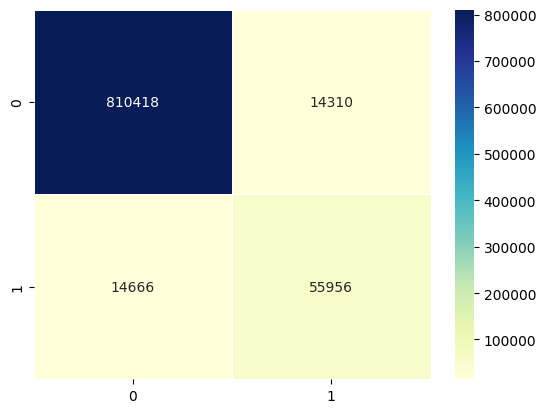

In [22]:

# Modelling logistic regression
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)

# Confusion matrix using confusion_matrix from sklearn
cfm = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(cfm, cmap='YlGnBu', annot=True, fmt='d', linewidths=.5);    
print('Recall: ',metrics.recall_score(y_test, y_pred))
print('Report: ',metrics.classification_report(y_test, y_pred))